In [22]:
#import the libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression,RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import classification_report, confusion_matrix ,plot_confusion_matrix , roc_curve,auc
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [6]:
os.getcwd()

'C:\\Users\\Tressy\\Desktop\\Semester 3\\Pred Analysis'

In [7]:
shopper=pd.read_csv('C:\\Users\\Tressy\\Desktop\\Semester 3\\Pred Analysis\\Datasets\\online_shoppers_intention.csv',encoding="utf8")

In [8]:
shopper.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


 Get the attribute name,type and dimension of the dataset and null count

In [9]:
#shopper = shopper.convert_dtypes()
shopper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Data Field description for numerical attributes**

**Administrative**: Number of pages visited by the visitor about account management 

**Administrative duration**:Total amount of time (in seconds) spent by the visitor on account management related
pages 

**Informational**: Number of pages visited by the visitor about Web site, communication and address information of the shopping site

**Informational duration**: Total amount of time (in seconds) spent by the visitor on informational pages 

**Product related**: Number of pages visited by visitor about product related pages 

**Product related duration**: Total amount of time (in seconds) spent by the visitor on product related pages 

**Bounce rate**: Average bounce rate value of the pages visited by the visitor (percentage of visitors who enter the site from that page and then leave (“bounce”) without triggering any other requests to the analytics server during that session.)

**Exit rate**: Average exit rate value of the pages visited by the visitor ( for all pageviews to the page, the percentage that were the last in the session. This is the number of exits from the website.)

**Page value**: Average page value of the pages visited by the visitor (average value for a web page that a user visited before completing an e-commerce transaction. It tells you which specific pages of the site offer the most value)

**Special day**: Closeness of the site visiting time to a special day in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

**Change the variable type for categorical/boolean variables to numeric below.**

**OperatingSystems**:  Operating system of the visitor  

**Browser**: Browser of the visitor  

**Region**: Geographic region from which the session has been started by the visitor 

**TrafficType**: Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct) 

**VisitorType**: Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’  

**Weekend**: Boolean value indicating whether the date of the visit is weekend  

**Month**: Month value of the visit date  

** Target Variable ** 

**Revenue**: Class label indicating whether the visit has been finalized with a transaction 

In [10]:
nom_attr=list(shopper)[10:18]
num_attr=list(shopper)[0:9]
print("Numerical attributes in the dataset",num_attr)
print("Nominal attributes in the dataset",nom_attr)

Numerical attributes in the dataset ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
Nominal attributes in the dataset ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [11]:
shopper[['Month']]=pd.Categorical(shopper.Month)
shopper[['Month']]=shopper.Month.cat.codes
shopper[['VisitorType']]=pd.Categorical(shopper.VisitorType)
shopper[['VisitorType']]=shopper.VisitorType.cat.codes

shopper[nom_attr]=shopper[nom_attr].astype(int,copy=False) 
shopper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int32  
 11  OperatingSystems         12330 non-null  int32  
 12  Browser                  12330 non-null  int32  
 13  Region                   12330 non-null  int32  
 14  TrafficType           

In [12]:
#shopper.describe().transpose() 
shopper.describe().loc[['mean','std','min','max']].transpose()

,mean,std,min,max
Administrative,2.315166,3.321784,0.0,27.000000
Administrative_Duration,80.818611,176.779107,0.0,3398.750000
Informational,0.503569,1.270156,0.0,24.000000
Informational_Duration,34.472398,140.749294,0.0,2549.375000
ProductRelated,31.731468,44.475503,0.0,705.000000
ProductRelated_Duration,1194.746220,1913.669288,0.0,63973.522230
BounceRates,0.022191,0.048488,0.0,0.200000
ExitRates,0.043073,0.048597,0.0,0.200000
PageValues,5.889258,18.568437,0.0,361.763742
SpecialDay,0.061427,0.198917,0.0,1.000000


**Data Distribution**

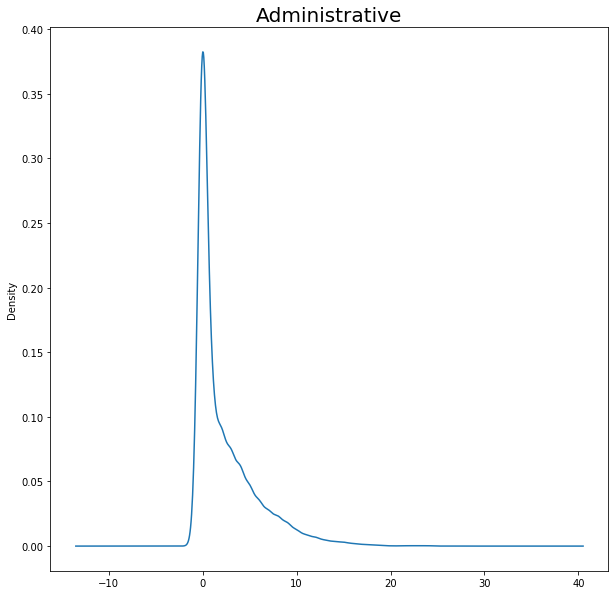

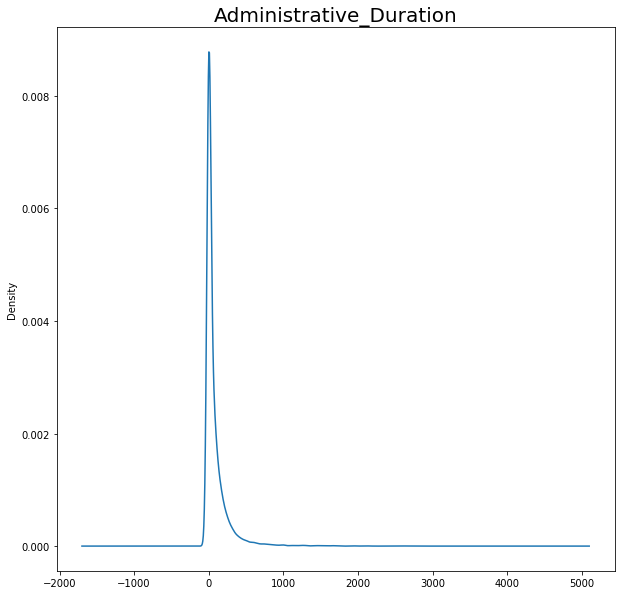

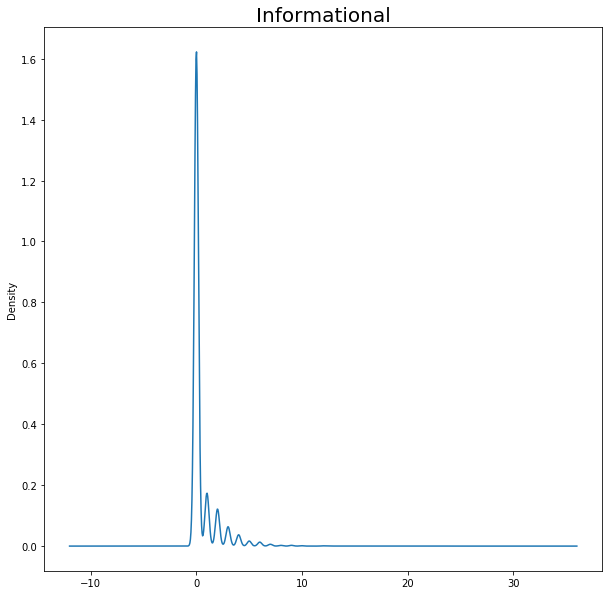

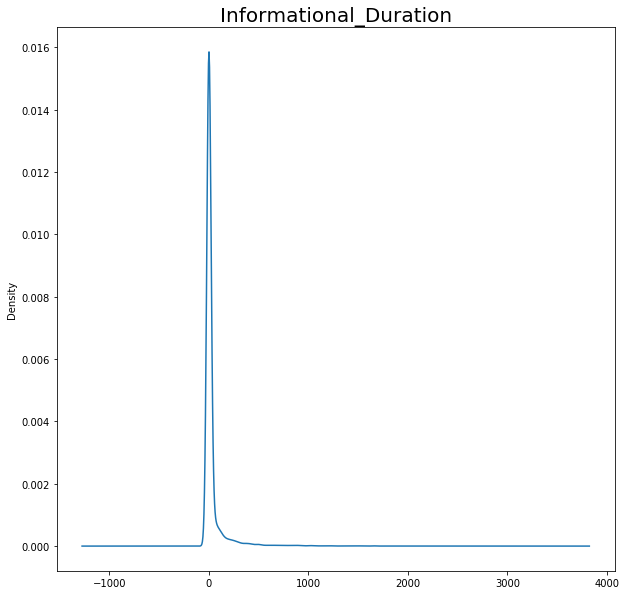

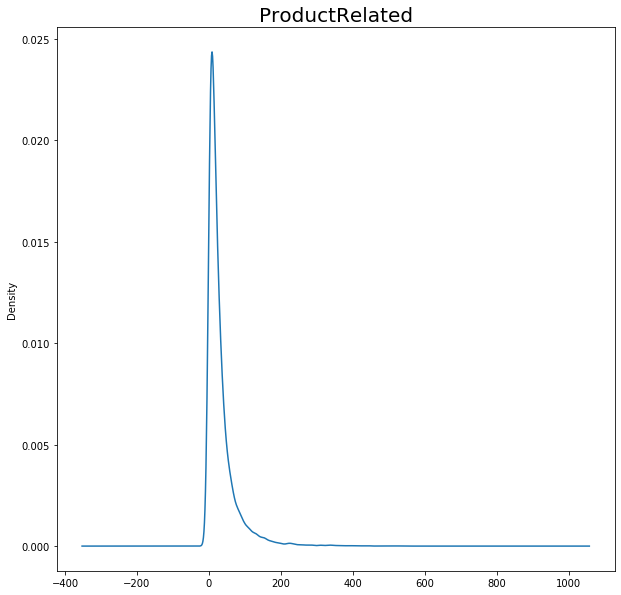

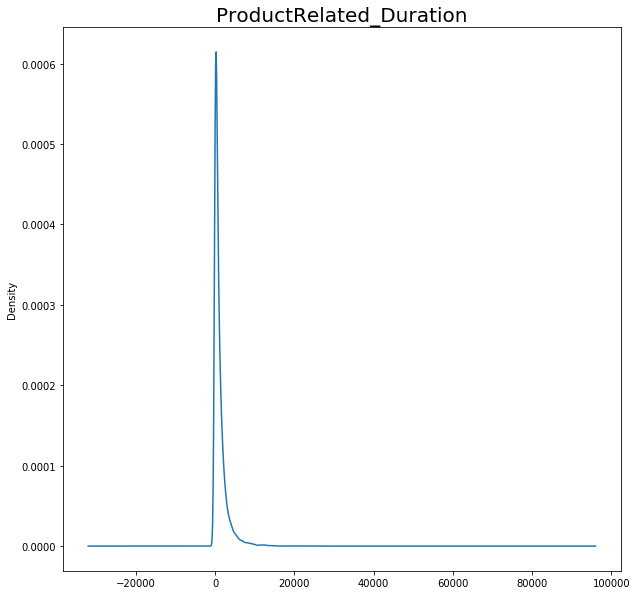

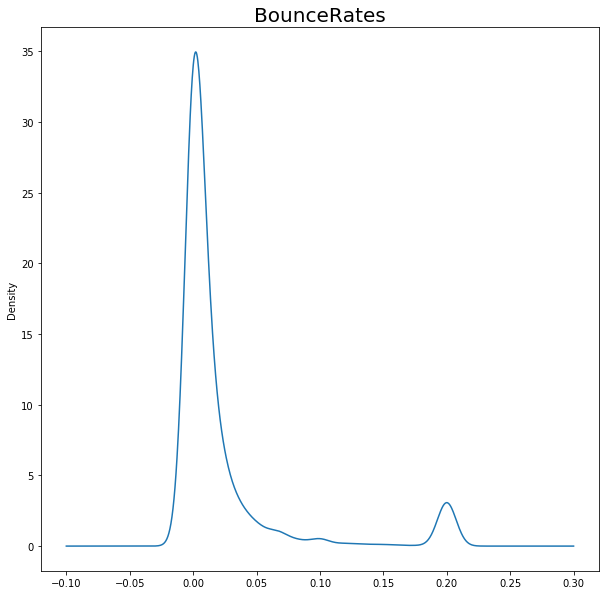

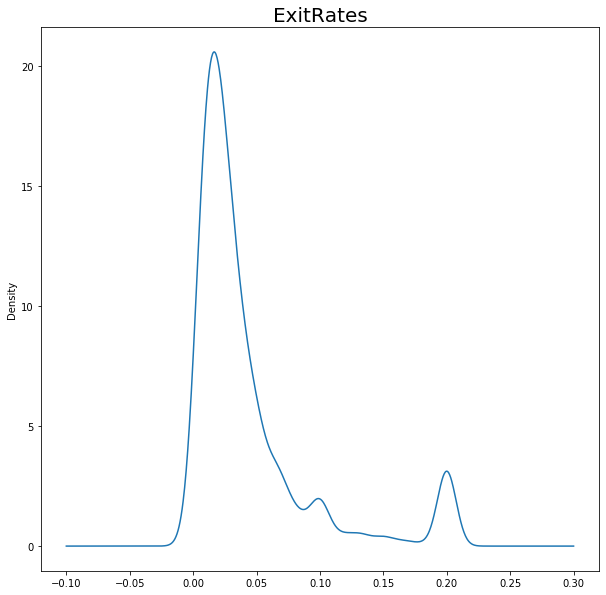

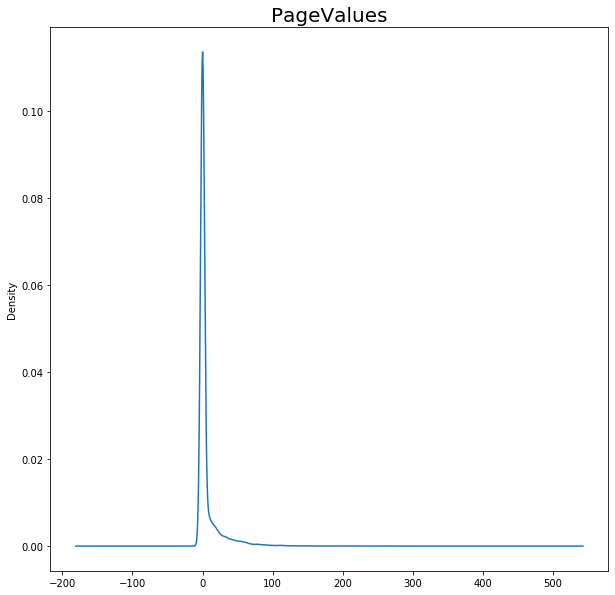

In [9]:
for i in num_attr:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    ax=shopper[i].plot.kde()
    ax.axes.set_title(i,fontsize=20)
    plt.show()

Check Normality, shewness and Kurtosis

In [10]:
from scipy.stats import anderson
for i in num_attr:
    res = anderson(shopper[i])
    ix=len(res.critical_values)-1
    if res.statistic < res.critical_values[ix]:
        print('Data is normal-fail to reject H0')
    else:
        print('Data is not normal -reject H0')

Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0


In [11]:
shopper.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
Month                     -0.832535
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
VisitorType               -2.065135
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [12]:
shopper.kurtosis()

Administrative               4.701146
Administrative_Duration     50.556739
Informational               26.932266
Informational_Duration      76.316853
ProductRelated              31.211707
ProductRelated_Duration    137.174164
BounceRates                  7.723159
ExitRates                    4.017035
PageValues                  65.635694
SpecialDay                   9.913659
Month                       -0.368330
OperatingSystems            10.456843
Browser                     12.746733
Region                      -0.148680
TrafficType                  3.479711
VisitorType                  2.295013
Weekend                     -0.397404
Revenue                      1.646493
dtype: float64

Anderson-Darling Test for normality. Null hypothesis=population is normally distributed. if the calculated test statistic is less than the critical value at a chosen significance level then data is normal.

**Outlier Detection**

Series([], Name: Administrative, dtype: int64)
248      16
282      13
478      13
502      18
510      14
         ..
11983    14
11988    14
12178    26
12233    13
12244    19
Name: Administrative, Length: 213, dtype: int64


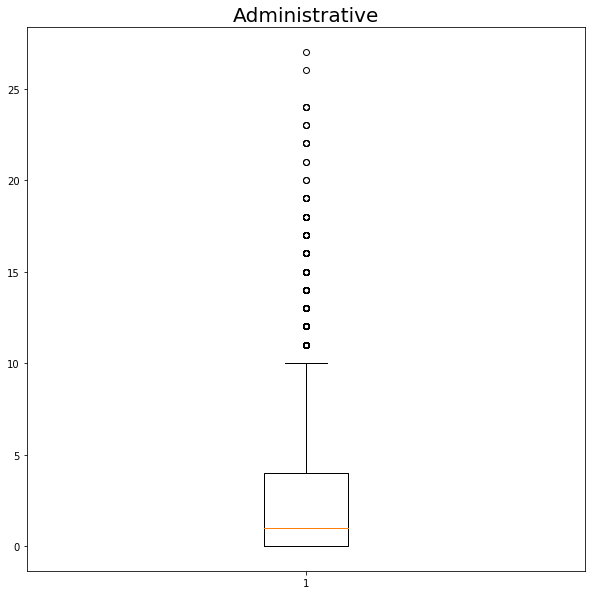

Series([], Name: Administrative_Duration, dtype: float64)
76       1005.666667
109       326.250000
128       462.000000
187       293.778205
191      1226.000000
            ...     
12244     739.194872
12247     311.136111
12265     413.499612
12285     369.333333
12307     305.125000
Name: Administrative_Duration, Length: 883, dtype: float64


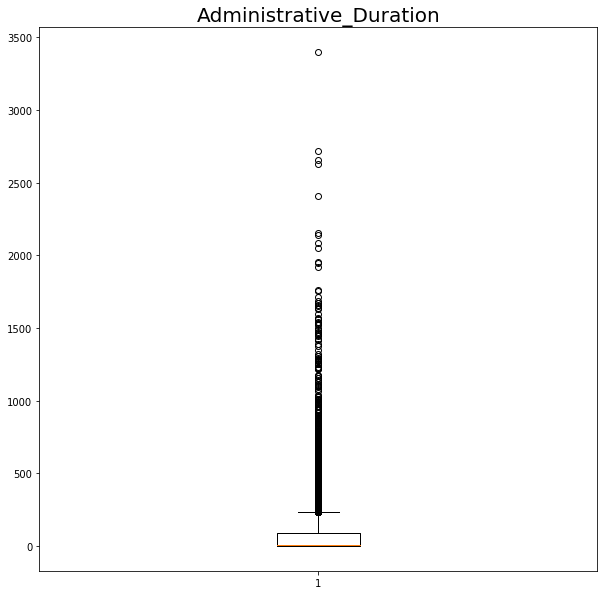

Series([], Name: Informational, dtype: int64)
29       1
57       2
98       1
103      1
106      1
        ..
12307    3
12311    2
12312    1
12313    3
12324    1
Name: Informational, Length: 2631, dtype: int64


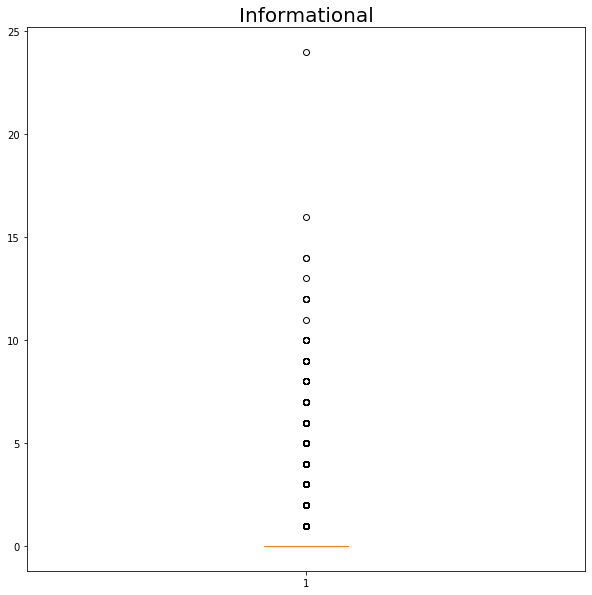

Series([], Name: Informational_Duration, dtype: float64)
57       120.00
103       16.00
109       94.00
114       93.00
122       75.00
          ...  
12295     33.75
12307    368.25
12311    211.25
12312      9.00
12313     86.00
Name: Informational_Duration, Length: 2405, dtype: float64


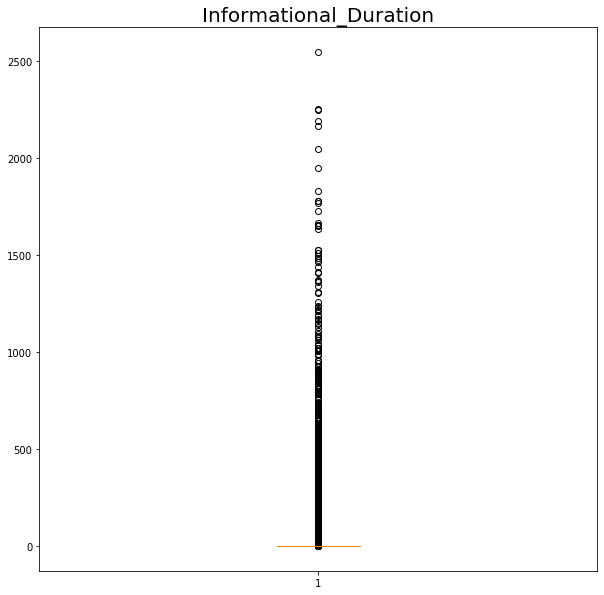

Series([], Name: ProductRelated, dtype: int64)
109      128
367      111
424      149
510      258
611      173
        ... 
12282    125
12285    133
12287    111
12311    144
12312    221
Name: ProductRelated, Length: 723, dtype: int64


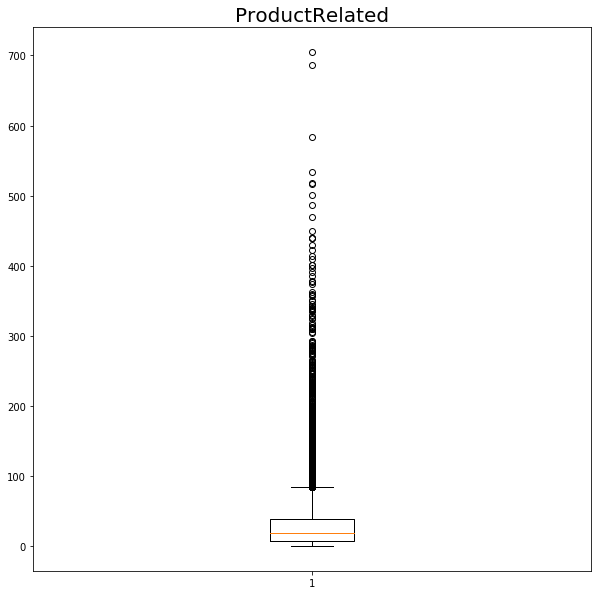

Series([], Name: ProductRelated_Duration, dtype: float64)
40        4084.393939
66        6951.972222
109       5062.213753
251       5188.500000
265       5220.083333
             ...     
12278     4845.989214
12282     7453.766667
12287     6340.152381
12311     4627.489571
12312    11431.001240
Name: ProductRelated_Duration, Length: 711, dtype: float64


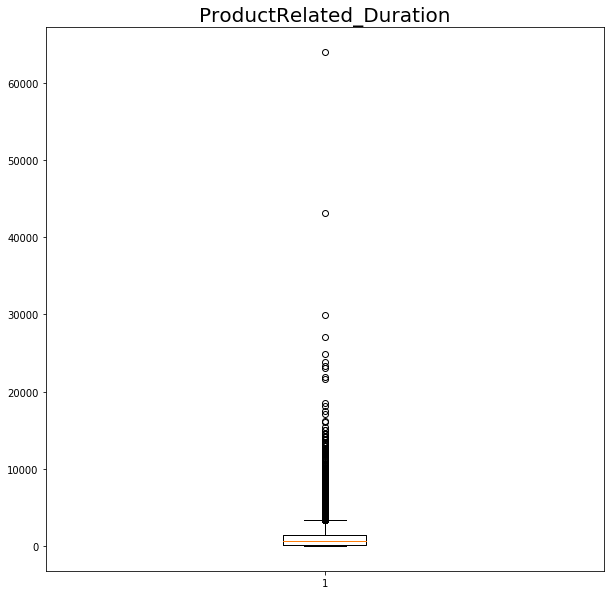

Series([], Name: BounceRates, dtype: float64)
0        0.200000
2        0.200000
6        0.200000
7        0.200000
16       0.200000
           ...   
12290    0.080000
12292    0.075000
12301    0.200000
12321    0.200000
12327    0.083333
Name: BounceRates, Length: 1316, dtype: float64


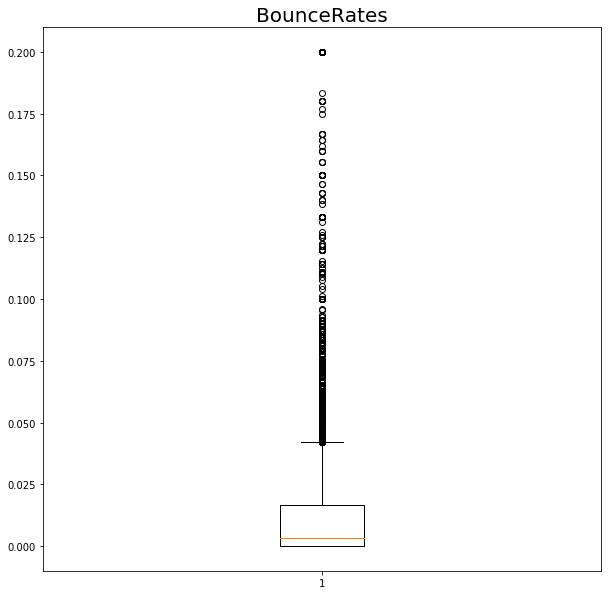

Series([], Name: ExitRates, dtype: float64)
0        0.20
2        0.20
3        0.14
6        0.20
7        0.20
         ... 
12197    0.20
12200    0.20
12220    0.20
12301    0.20
12321    0.20
Name: ExitRates, Length: 989, dtype: float64


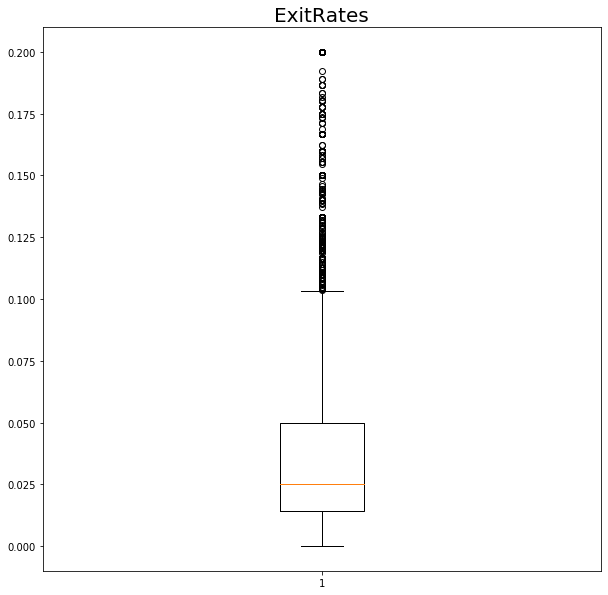

Series([], Name: PageValues, dtype: float64)
29       54.179764
57       19.447079
62       38.308493
65       22.916036
76       11.439412
           ...    
12307    39.519807
12312     1.582473
12313    78.811725
12319     3.685401
12325    12.241717
Name: PageValues, Length: 2730, dtype: float64


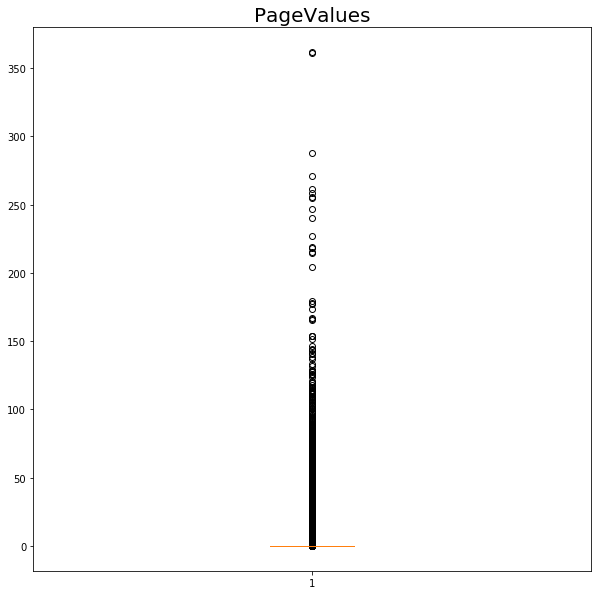

In [13]:
for i in num_attr:
    Q3,Q1=np.percentile(shopper[i],[75,25])
    IQ=Q3-Q1
    LB=Q1-2*IQ
    UB=Q3+2*IQ
    print(shopper[i][shopper[i]<LB])
    print(shopper[i][shopper[i]>UB])
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    ax.boxplot(shopper[i])
    ax.axes.set_title(i,fontsize=20)
    plt.show()

Remove the max value instances which seems to be outlier from the dataset.


In [14]:
#shopper.drop(shopper['Administrative_Duration'].idmax())
shopper=shopper.drop(shopper['Administrative_Duration'].idxmax())
shopper=shopper.drop(shopper['Informational_Duration'].idxmax())
shopper=shopper.drop(shopper['ProductRelated_Duration'].idxmax())
shopper=shopper.drop(shopper['ProductRelated_Duration'].idxmax())
shopper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12326 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12326 non-null  int64  
 1   Administrative_Duration  12326 non-null  float64
 2   Informational            12326 non-null  int64  
 3   Informational_Duration   12326 non-null  float64
 4   ProductRelated           12326 non-null  int64  
 5   ProductRelated_Duration  12326 non-null  float64
 6   BounceRates              12326 non-null  float64
 7   ExitRates                12326 non-null  float64
 8   PageValues               12326 non-null  float64
 9   SpecialDay               12326 non-null  float64
 10  Month                    12326 non-null  int32  
 11  OperatingSystems         12326 non-null  int32  
 12  Browser                  12326 non-null  int32  
 13  Region                   12326 non-null  int32  
 14  TrafficType           

Categorical Variable distribution

No:of values in feature:  Month = 10
6    27.274939
7    24.314680
5    15.466342
1    13.982157
8     4.452555
9     3.633414
0     3.511760
3     3.503650
4     2.335766
2     1.492295
Name: Month, dtype: float64


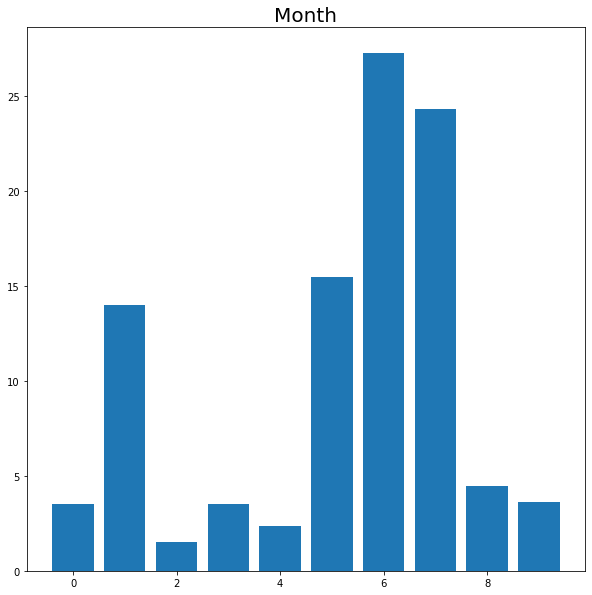

No:of values in feature:  OperatingSystems = 8
2    53.503650
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: OperatingSystems, dtype: float64


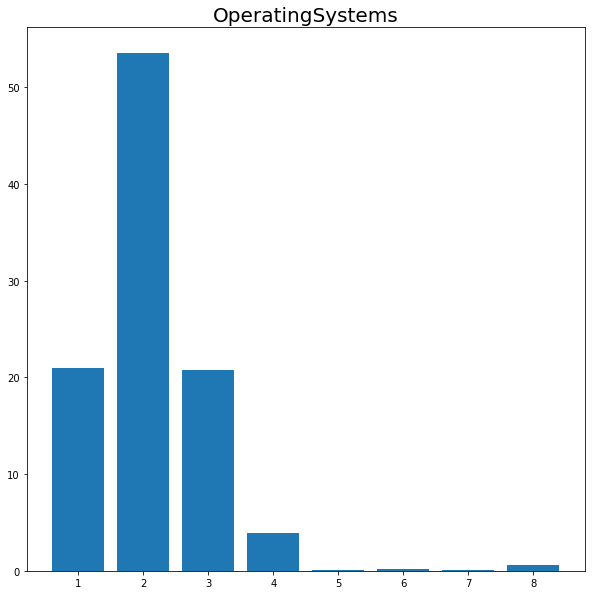

No:of values in feature:  Browser = 13
2     64.533658
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: Browser, dtype: float64


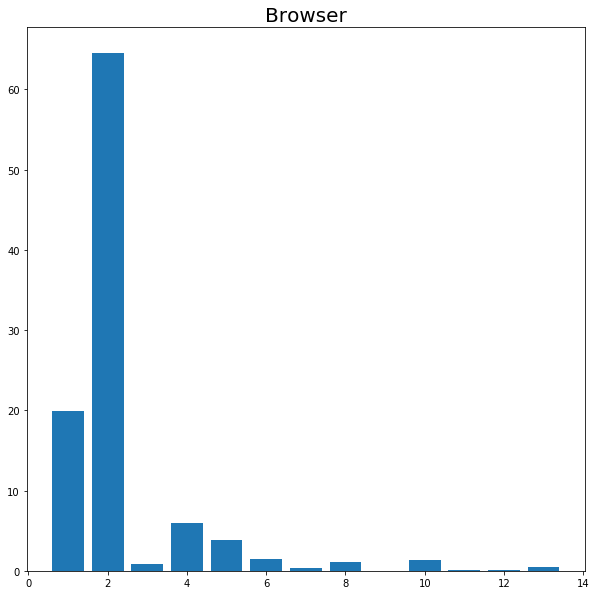

No:of values in feature:  Region = 9
1    38.734793
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: Region, dtype: float64


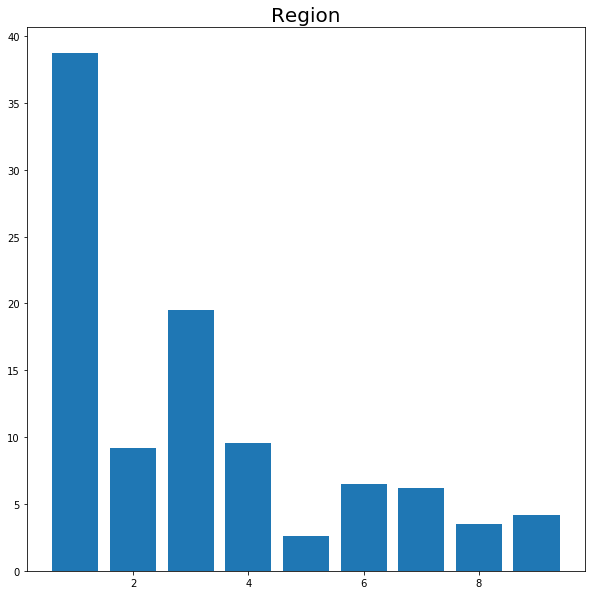

No:of values in feature:  TrafficType = 20
2     31.719384
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6      3.600973
8      2.773723
5      2.108678
11     2.003244
20     1.605839
9      0.340633
7      0.324412
15     0.308191
19     0.137875
14     0.097324
18     0.081103
16     0.024331
12     0.008110
17     0.008110
Name: TrafficType, dtype: float64


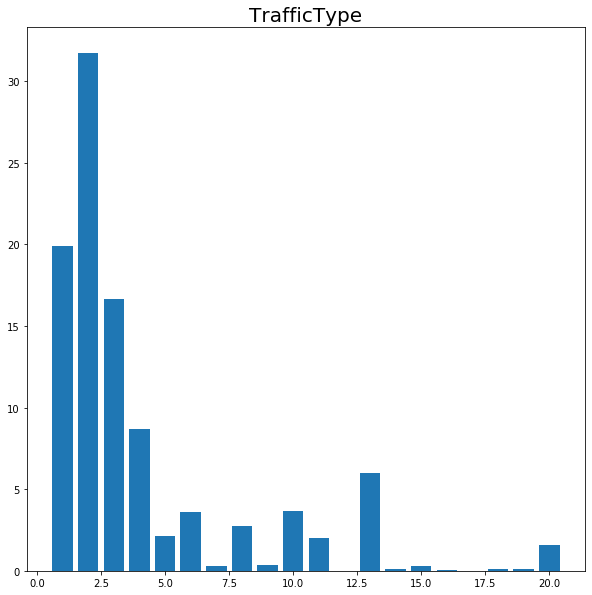

No:of values in feature:  VisitorType = 3
2    85.539335
0    13.738848
1     0.689376
Name: VisitorType, dtype: float64


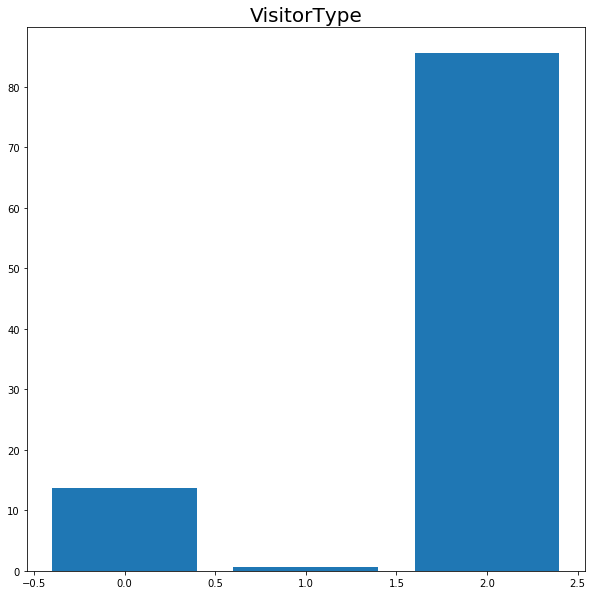

No:of values in feature:  Weekend = 2
0    76.715328
1    23.252230
Name: Weekend, dtype: float64


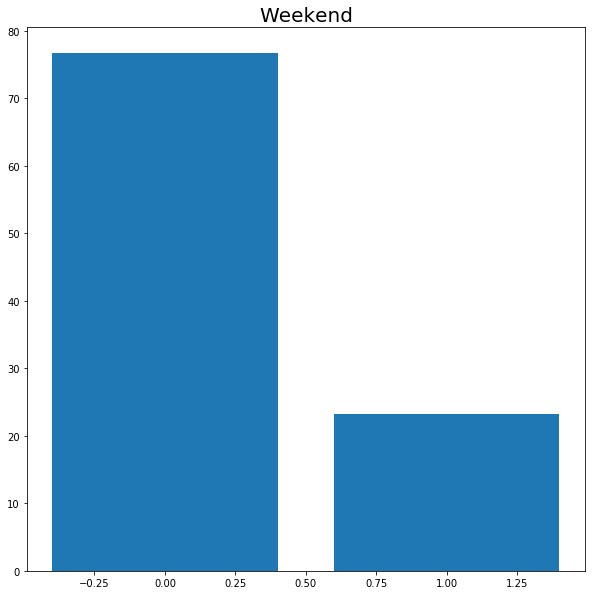

No:of values in feature:  Revenue = 2
0    84.493106
1    15.474453
Name: Revenue, dtype: float64


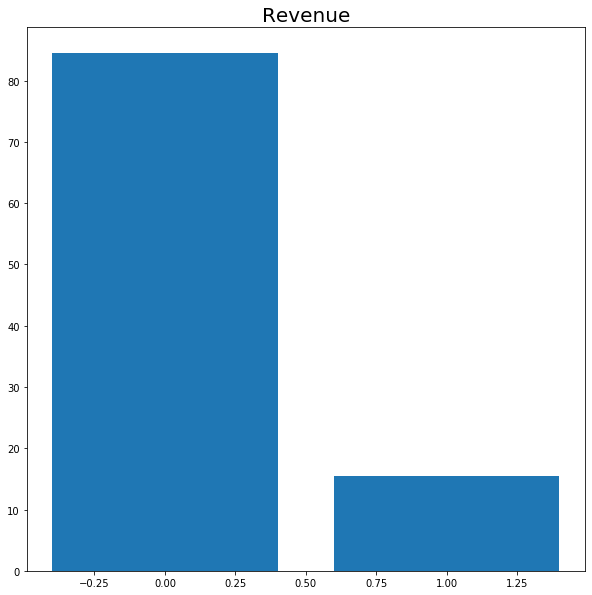

In [15]:
for i in nom_attr:
    print("No:of values in feature: ",i,"=",shopper[i].value_counts().count())
    cat_val_cnt=shopper[i].value_counts()/123.30
    cat_ix=cat_val_cnt.index
    print(cat_val_cnt)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    ax.bar(cat_ix,cat_val_cnt)
    ax.axes.set_title(i,fontsize=20)
    plt.show()
    

Revenue     0    1
Month             
0         357   76
1        1508  216
2         181    3
3         366   66
4         259   29
5        1715  192
6        2998  365
7        2238  760
8         434  115
9         362   86


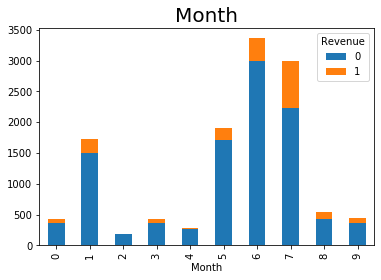

Revenue              0     1
OperatingSystems            
1                 2206   379
2                 5442  1155
3                 2287   268
4                  393    85
5                    5     1
6                   17     2
7                    6     1
8                   62    17


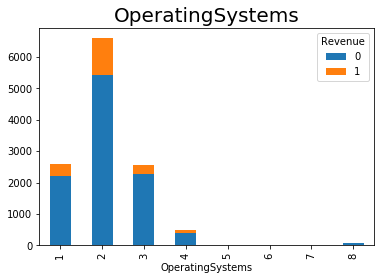

Revenue       0       1
Browser                
1        2097.0   365.0
2        6734.0  1223.0
3         100.0     5.0
4         606.0   130.0
5         381.0    86.0
6         154.0    20.0
7          43.0     6.0
8         114.0    21.0
9           1.0     NaN
10        131.0    32.0
11          5.0     1.0
12          7.0     3.0
13         45.0    16.0


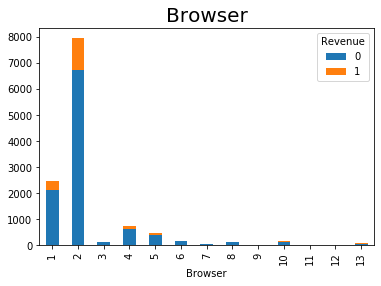

Revenue     0    1
Region            
1        4005  771
2         948  188
3        2054  349
4        1007  175
5         266   52
6         693  112
7         642  119
8         378   56
9         425   86


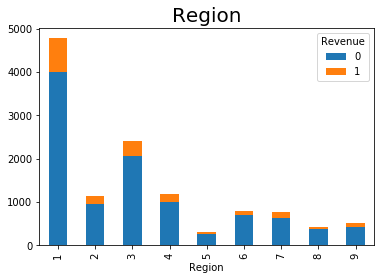

Revenue           0      1
TrafficType               
1            2189.0  262.0
2            3064.0  847.0
3            1872.0  180.0
4             904.0  165.0
5             204.0   56.0
6             391.0   53.0
7              28.0   12.0
8             247.0   95.0
9              38.0    4.0
10            360.0   90.0
11            200.0   47.0
12              1.0    NaN
13            695.0   43.0
14             10.0    2.0
15             38.0    NaN
16              2.0    1.0
17              1.0    NaN
18             10.0    NaN
19             16.0    1.0
20            148.0   50.0


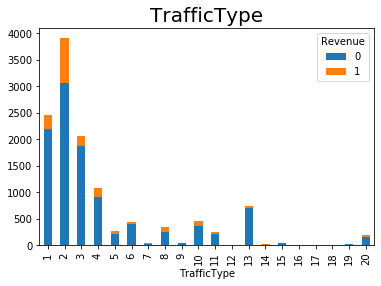

Revenue         0     1
VisitorType            
0            1272   422
1              69    16
2            9077  1470


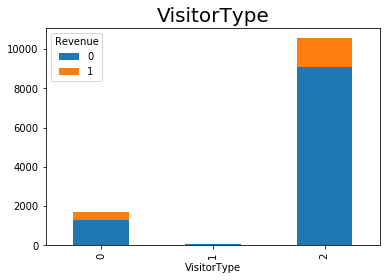

Revenue     0     1
Weekend            
0        8050  1409
1        2368   499


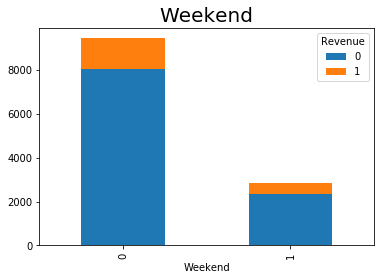

Revenue        0       1
Revenue                 
0        10418.0     NaN
1            NaN  1908.0


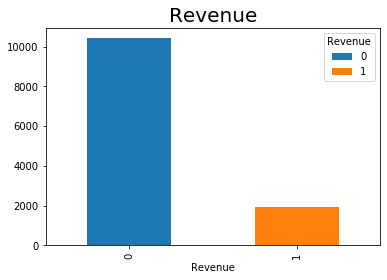

In [16]:
for i in nom_attr:
    shopper_group=shopper.groupby([i,'Revenue'],sort=True)['Revenue'].count().unstack()
    print(shopper_group)
    ax = shopper_group.plot(kind='bar', stacked=True)
    ax.axes.set_title(i,fontsize=20)
    plt.show()

In [17]:
shopper.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0

Data transformation . min max

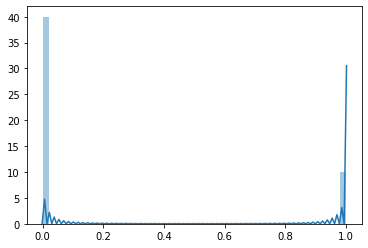

In [53]:
#from sklearn.preprocessing import MinMaxScaler
#minmax=MinMaxScaler()
#shopper_scaled=minmax.fit_transform(shopper[num_attr])
#shopper_scaled
#sns.distplot(shopper_scaled[2])
#sns.distplot(shopper[['Administrative_Duration']])

Correlation

In [18]:
shopper[num_attr].corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
Administrative,1.000000,0.610964,0.374474,0.255148,0.429919,0.389140,-0.223605,-0.316625,0.099364
Administrative_Duration,0.610964,1.000000,0.276369,0.189223,0.260817,0.292317,-0.147327,-0.211057,0.071104
Informational,0.374474,0.276369,1.000000,0.611358,0.354330,0.363999,-0.117292,-0.165665,0.050475
Informational_Duration,0.255148,0.189223,0.611358,1.000000,0.253629,0.284534,-0.075101,-0.108135,0.033737
ProductRelated,0.429919,0.260817,0.354330,0.253629,1.000000,0.879071,-0.206679,-0.295867,0.057937
ProductRelated_Duration,0.389140,0.292317,0.363999,0.284534,0.879071,1.000000,-0.197140,-0.270298,0.059140
BounceRates,-0.223605,-0.147327,-0.117292,-0.075101,-0.206679,-0.197140,1.000000,0.913010,-0.119429
ExitRates,-0.316625,-0.211057,-0.165665,-0.108135,-0.295867,-0.270298,0.913010,1.000000,-0.174533
PageValues,0.099364,0.071104,0.050475,0.033737,0.057937,0.059140,-0.119429,-0.174533,1.000000


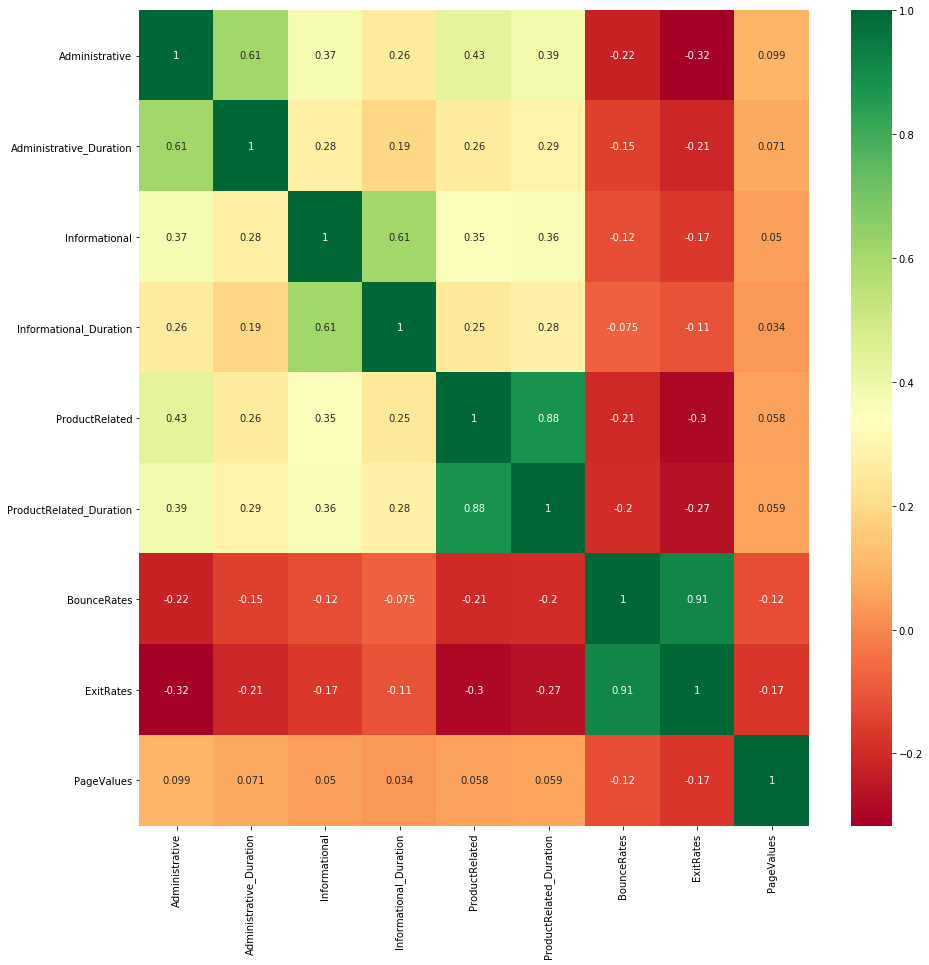

In [73]:
plt.figure(figsize=(15,15))
sns.heatmap(shopper[num_attr].corr(),annot=True,cmap="RdYlGn")
#sns.heatmap(shopper.corr(),annot=True,cmap="RdYlGn")

In [21]:
shopper.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


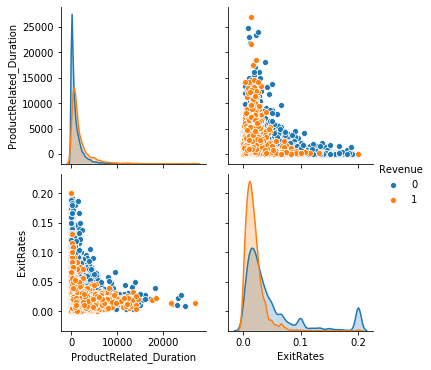

In [22]:
sns.pairplot(shopper[['ProductRelated_Duration','ExitRates','Revenue']],hue='Revenue')

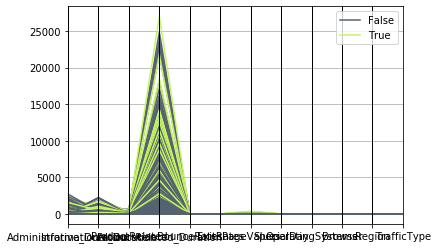

In [24]:
pd.plotting.parallel_coordinates(shopper[['Administrative_Duration','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Revenue']],'Revenue',color=('#556270','#C7F464'))

zscore normilization

In [53]:
shopper_norm=shopper[num_attr] 
#shopper_norm=shopper_norm.apply(stats.zscore)

C:\Users\Tressy\AppData\Local\Programs\Conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Tressy\AppData\Local\Programs\Conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Tressy\AppData\Local\Programs\Conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

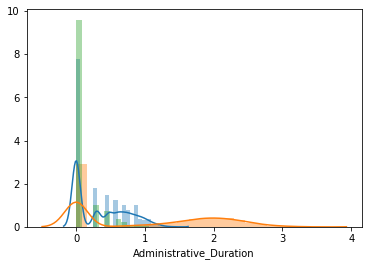

In [25]:
import math
shopper_norm=shopper[num_attr]
for i in num_attr:
    shopper_norm[i]=shopper.apply(lambda x: math.log10(1+x[i]), axis=1)
    sns.distplot(shopper_norm[i], bins='auto');

Chi-square test for feature selection: 

Null Hypothesis (H0): Two variables are independent.

Alternate Hypothesis (H1): Two variables are not independent.


If Statistic >= Critical Value: reject null hypothesis (H0), dependent.
If Statistic < Critical Value:  fail to reject null hypothesis (H0), independent.

If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
inp=shopper[nom_attr] 
chi_scores=chi2(shopper[nom_attr],shopper['Revenue'])
chi_scores 
 

(array([8.57864294e+01, 1.03984812e+00, 8.85202997e+00, 3.10246263e+00,
        1.24177006e+00, 3.75111561e+01, 8.12431404e+00, 1.04180000e+04]),
 array([2.00457121e-20, 3.07856798e-01, 2.92763107e-03, 7.81739579e-02,
        2.65130193e-01, 9.08916206e-10, 4.36755059e-03, 0.00000000e+00]))

FEATURE SELECTION USING rfe, front, back propogation with logistic reg. 

1. With all available features
2. With filtered features 
3. Wrapper feature selection 

    a) RFE
    
    b) Stepwise fwd prop
    
    c) Bck prop
    

In [18]:
#With all available features
in_vars=list(shopper)[0:17] 
# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
#logistic reg model
logit = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)
#Training accuray - To check under/over fitting
logit.score(x_train, y_train)

0.8862530413625304

Training Data
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      9114
           1       0.37      0.74      0.50       750

    accuracy                           0.89      9864
   macro avg       0.68      0.82      0.72      9864
weighted avg       0.93      0.89      0.90      9864

Test Data
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2262
           1       0.36      0.75      0.49       204

    accuracy                           0.87      2466
   macro avg       0.67      0.82      0.71      2466
weighted avg       0.92      0.87      0.89      2466



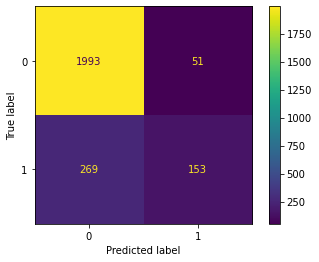

[[1993   51]
 [ 269  153]]


In [19]:
# Predict 
y_train_pred=logit.predict(x_train)
y_pred=logit.predict(x_test)
print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
plot_confusion_matrix(logit, x_test, y_test)   
plt.show() 
print(confusion_matrix(y_test,y_pred))

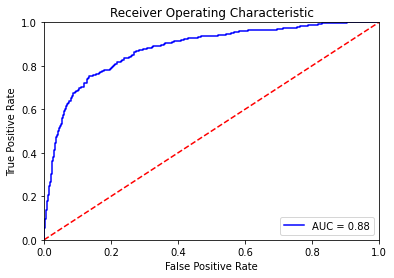

In [24]:
y_probas=logit.predict_proba(x_test)
preds = y_probas[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

           0                     vars
7  -1.466467                ExitRates
9  -1.290717               SpecialDay
6  -1.109379              BounceRates
15 -0.334220              VisitorType
11 -0.091545         OperatingSystems
13 -0.014647                   Region
1  -0.000127  Administrative_Duration
5   0.000043  ProductRelated_Duration
3   0.000070   Informational_Duration
14  0.000105              TrafficType
4   0.005177           ProductRelated
0   0.015062           Administrative
2   0.021180            Informational
12  0.033552                  Browser
16  0.069512                  Weekend
8   0.086220               PageValues
10  0.095727                    Month


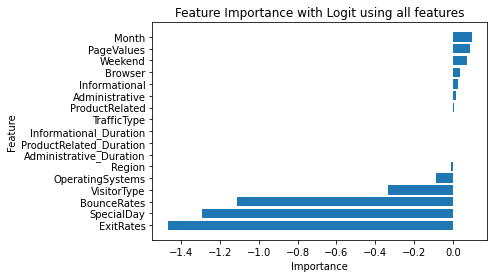

In [25]:
#Feature importance
imp=pd.DataFrame(data=logit.coef_)
imp=imp.transpose()
imp['vars']=in_vars
imp=imp.sort_values(by=[0])
print(imp)
plt.barh(imp['vars'],imp[0],align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with Logit using all features')
plt.show()


In [26]:
#Check with filtered features 
in_vars=['Administrative', 'Informational','ProductRelated_Duration','ExitRates', 'PageValues','Month', 'Browser', 'Region','VisitorType', 'Weekend']
# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
#logistic reg model
logit = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)

Training Data
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      9120
           1       0.38      0.75      0.50       744

    accuracy                           0.89      9864
   macro avg       0.68      0.82      0.72      9864
weighted avg       0.93      0.89      0.90      9864

Test Data
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2269
           1       0.35      0.76      0.48       197

    accuracy                           0.87      2466
   macro avg       0.66      0.82      0.70      2466
weighted avg       0.93      0.87      0.89      2466



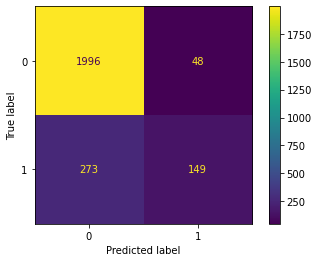

[[1996   48]
 [ 273  149]]


In [27]:
# Predict 
y_train_pred=logit.predict(x_train)
y_pred=logit.predict(x_test)
#logit.score(x_test, y_test)
print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logit, x_test, y_test)  # doctest: +SKIP
plt.show() 
print(confusion_matrix(y_test,y_pred))

In [28]:
y_probas=logit.predict_proba(x_test)
preds = y_probas[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'metrics' is not defined

          0                     vars
3 -5.446501                ExitRates
8 -0.309523              VisitorType
7 -0.014658                   Region
2  0.000140  ProductRelated_Duration
0  0.017526           Administrative
1  0.026995            Informational
6  0.028106                  Browser
4  0.084801               PageValues
9  0.089269                  Weekend
5  0.097753                    Month


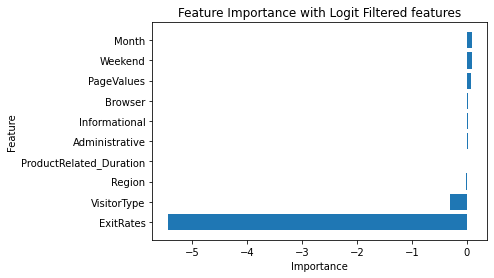

In [29]:
#Feature importance
imp=pd.DataFrame(data=logit.coef_)
imp=imp.transpose()
imp['vars']=in_vars
imp=imp.sort_values(by=[0])
print(imp)
plt.barh(imp['vars'],imp[0],align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with Logit Filtered features')
plt.show()

#### RFE Feature selection

In [30]:
#Check with wrapper method RFE 
in_vars=list(shopper)[0:17]
X_train, X_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size = 0.2, random_state = 0)
#no of features
nof_list=np.arange(1,17)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    logit = LogisticRegression(solver='liblinear',random_state=0)
    rfe_selector = RFE(logit,nof_list[n])
    X_train_rfe = rfe_selector.fit_transform(X_train,y_train)
    X_test_rfe = rfe_selector.transform(X_test)
    logit.fit(X_train_rfe,y_train)
    score = logit.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

 

C:\Users\Tressy\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Tressy\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Tressy\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Tressy\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing thes

Optimum number of features: 15
Score with 15 features: 0.870641


#### Build, Train, Test model for RFE selected features

C:\Users\Tressy\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Training Data
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      9153
           1       0.37      0.77      0.50       711

    accuracy                           0.89      9864
   macro avg       0.67      0.83      0.72      9864
weighted avg       0.94      0.89      0.91      9864

Test Data
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2270
           1       0.35      0.76      0.48       196

    accuracy                           0.87      2466
   macro avg       0.66      0.82      0.70      2466
weighted avg       0.93      0.87      0.89      2466



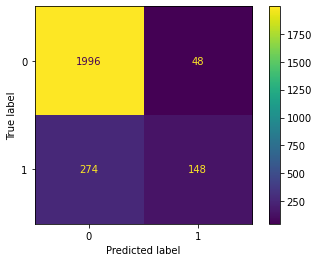

[[1996   48]
 [ 274  148]]


In [31]:
# Split into train and test

x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
#logistic reg model

rfe_selector = RFE(logit,8)
rfe_x_train = rfe_selector.fit_transform(x_train,y_train)
logit = LogisticRegression(solver='liblinear', random_state=0).fit(rfe_x_train, y_train)
y_train_pred=logit.predict(rfe_x_train)
rfe_x_test = rfe_selector.transform(x_test)
y_pred=logit.predict(rfe_x_test)
#logit.score(x_test, y_test)
print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logit, rfe_x_test, y_test)   
plt.show() 
print(confusion_matrix(y_test,y_pred))


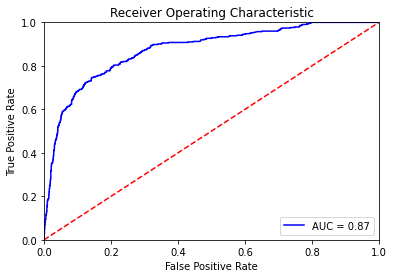

In [34]:
y_probas=logit.predict_proba(rfe_x_test)
preds = y_probas[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

          0           vars
2 -5.502297      ExitRates
1 -3.073443    BounceRates
4 -1.139524     SpecialDay
6 -0.161980    VisitorType
3  0.078241     PageValues
7  0.112124        Weekend
5  0.120755          Month
0  0.126046  Informational


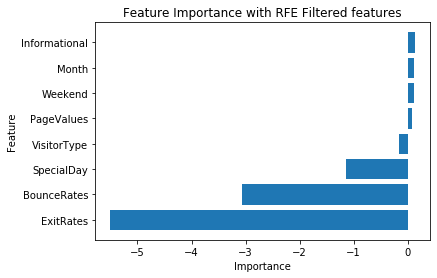

In [38]:
#Feature importance
imp=pd.DataFrame(data=logit.coef_)
imp=imp.transpose()
temp = pd.Series(rfe_selector.support_,index = in_vars)
imp['vars']=temp[temp==True].index
imp=imp.sort_values(by=[0])
print(imp)
plt.barh(imp['vars'],imp[0],align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with RFE Filtered features')
plt.show()

### Feature selection using step forward

In [39]:
# Build step forward feature selection
in_vars=list(shopper)[0:17]
X_train, X_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size = 0.2, random_state = 0)
logit = LogisticRegression(solver='liblinear',random_state=0)
step_fwd = sfs(logit,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
step_fwd  = step_fwd.fit(X_train, y_train)
step_fwd_vars = list(step_fwd.k_feature_idx_)
print(step_fwd_vars)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.6s finished

[2020-11-04 10:06:45] Features: 1/10 -- score: 0.8842799188640973[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.7s finished

[2020-11-04 10:06:46] Features: 2/10 -- score: 0.8846855983772819[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.9s finished

[2020-11-04 10:06:47] Features: 3/10 -- score: 0.884787018255578[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[1, 6, 7, 8, 11, 12, 13, 14, 15, 16]


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.2s finished

[2020-11-04 10:07:00] Features: 10/10 -- score: 0.884787018255578

Training Data
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      9160
           1       0.35      0.76      0.48       700

    accuracy                           0.88      9860
   macro avg       0.67      0.83      0.71      9860
weighted avg       0.94      0.88      0.90      9860

Test Data
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2303
           1       0.33      0.82      0.47       163

    accuracy                           0.88      2466
   macro avg       0.66      0.85      0.70      2466
weighted avg       0.94      0.88      0.90      2466



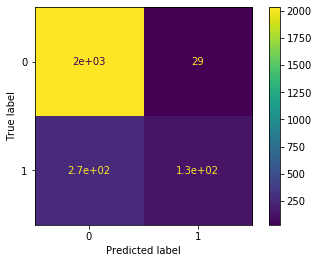

[[2034   29]
 [ 269  134]]


In [53]:
# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
step_fwd_vars=list(shopper.iloc[1:,[1, 6, 7, 8, 11, 12, 13, 14, 15, 16]])
sfs_x_train=x_train[step_fwd_vars]
sfs_x_test=x_test[step_fwd_vars]
logit = LogisticRegression(solver='liblinear', random_state=0).fit(sfs_x_train, y_train)
y_train_pred=logit.predict(sfs_x_train)
y_pred=logit.predict(sfs_x_test)
#logit.score(x_test, y_test)
print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logit, sfs_x_test, y_test)   
plt.show() 
print(confusion_matrix(y_test,y_pred))

In [23]:
y_probas=logit.predict_proba(sfs_x_test)
preds = y_probas[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'sfs_x_test' is not defined

          0                     vars
2 -5.748546                ExitRates
1 -3.472013              BounceRates
8 -0.144827              VisitorType
4 -0.077614         OperatingSystems
6 -0.029604                   Region
0  0.000596  Administrative_Duration
7  0.004315              TrafficType
5  0.021663                  Browser
3  0.078278               PageValues
9  0.167526                  Weekend


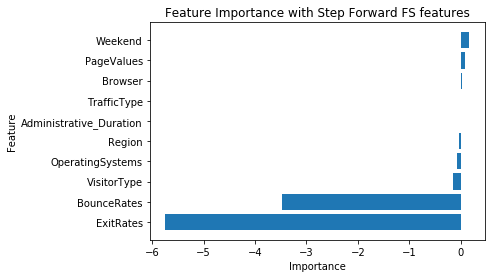

In [54]:
#Feature importance
imp=pd.DataFrame(data=logit.coef_)
imp=imp.transpose()
imp['vars']=step_fwd_vars
imp=imp.sort_values(by=[0])
print(imp)
plt.barh(imp['vars'],imp[0],align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with Step Forward FS features')
plt.show()


In [72]:
shopper[step_fwd_vars]

,Administrative_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.200000,0.200000,0.000000,1,1,1,1,2,0
1,0.0,0.000000,0.100000,0.000000,2,2,1,2,2,0
2,0.0,0.200000,0.200000,0.000000,4,1,9,3,2,0
3,0.0,0.050000,0.140000,0.000000,3,2,2,4,2,0
4,0.0,0.020000,0.050000,0.000000,3,3,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...
12325,145.0,0.007143,0.029031,12.241717,4,6,1,1,2,1
12326,0.0,0.000000,0.021333,0.000000,3,2,1,8,2,1
12327,0.0,0.083333,0.086667,0.000000,3,2,1,13,2,1
12328,75.0,0.000000,0.021053,0.000000,2,2,3,11,2,0


In [1]:
# Embedded Method

In [59]:
in_vars=list(shopper)[0:17]
X_train, X_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size = 0.3, random_state = 0)
lasso_reg=RidgeCV(cv=10).fit(X_train, y_train)
coef = pd.Series(lasso_reg.coef_, index = X_train.columns)
print(coef)

Administrative             0.001620
Administrative_Duration   -0.000015
Informational              0.003851
Informational_Duration     0.000008
ProductRelated             0.000449
ProductRelated_Duration    0.000008
BounceRates                0.409164
ExitRates                 -0.888018
PageValues                 0.009247
SpecialDay                -0.068581
Month                      0.007483
OperatingSystems          -0.007360
Browser                    0.003663
Region                    -0.002079
TrafficType               -0.000092
VisitorType               -0.031724
Weekend                    0.001223
dtype: float64


In [60]:
sel_features=coef != 0
sel_features

Administrative             True
Administrative_Duration    True
Informational              True
Informational_Duration     True
ProductRelated             True
ProductRelated_Duration    True
BounceRates                True
ExitRates                  True
PageValues                 True
SpecialDay                 True
Month                      True
OperatingSystems           True
Browser                    True
Region                     True
TrafficType                True
VisitorType                True
Weekend                    True
dtype: bool

## SVM 